In [169]:
import pandas as pd
import os
import numpy as np
import requests
import matplotlib.pyplot as plt

In [170]:
# Variable explanation:
# https://api.census.gov/data/2019/acs/acs5/variables.html

In [171]:
######################################################################
# DEMOGRAPHIC DATA FOR 2012 TO 2019
######################################################################

import requests
import pandas as pd

years = range(2012, 2020) # from 2012 to 2019
all_demographic_data = []

for year in years:
    api_url = f"https://api.census.gov/data/{year}/acs/acs5"
    params = {
        "get": ",".join([
            "NAME",
            "B19013_001E",   # Median Household Income
            "B01003_001E",   # Total Population
            "B15003_001E",   # Total Population age 25+
            "B25077_001E",   # Price
            "B23025_004E",   #"Employed",
            "B23025_003E",   # Labor Force
            "B25010_001E",   # Avg Household Size
            "B17001_001E",   # Poverty universe total
            "B17001_002E",   # Below poverty
            "B19083_001E",   # Gini Index: Measures income disparity (0 = equal, 1 = very unequal)
            # Education levels — full B15003 block from 002E to 025E
            "B15003_019E",
            "B15003_020E",
            "B15003_021E",
            "B15003_022E",
            # Race Levels
            "B02001_002E", # White people
            "B02001_003E", # Black or African American
            "B02001_004E", # American Indian and Alaska Native
            "B02001_005E", # Asian
            "B25001_001E", # Number of housing Units

        ]),
        "for": "tract:*", # census track 
        "in": "state:06 county:*" # census track for california

    }

    response = requests.get(api_url, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data[1:], columns=data[0])
        
        df.rename(columns={
            "B19013_001E": "Median_Household_Income",
            "B01003_001E": "Total_Population",
            "B15003_001E": "Total_Population_Older_than_25",
            "B25077_001E": "PRICE",
            "B23025_004E": "Employed",
            "B23025_003E": "Labor_Force",
            "B25010_001E": "Avg_Household_Size",
            "B17001_001E": "Poverty_Universe",
            "B17001_002E": "Below_Poverty",
            "B19083_001E": "Gini_Index",
            "B02001_002E": "White",
            "B02001_003E": "Black_or_African_American",
            "B02001_004E": "American_Indian_and_Alaska_Native", 
            "B02001_005E": "Asian",
            "zip code tabulation area": "ZIP_CODE",
            "B15003_019E": "Bachelor_Degree",
            "B15003_020E": "Master_Degree",
            "B15003_021E": "Professional_Degree",
            "B15003_022E": "Doctorate_Degree",
            "B25001_001E": "Number_Houses"
        }, inplace=True)

        df["YEAR"] = year
        all_demographic_data.append(df)
    else:
        print(f"Failed for {year}: {response.status_code}")

# Combine all years
demographic_data_2012_2019 = pd.concat(all_demographic_data, ignore_index=True)

# Keep only useful columns
demographic_data_2012_2019 = demographic_data_2012_2019.drop(columns =["NAME", "state"])

#Employed: B23025_004E
#Labor Force: B23025_003E

#demographic_data_2012_2019.head()

In [172]:

######################################################################
# DEMOGRAPHIC DATA FOR 2020 TO 2023
######################################################################

years = range(2020, 2024)  # From 2020 to 2023
all_demographic_data_2020s = []

for year in years:
    print(f"\n===== Processing Year {year} =====")
    
    api_url = f"https://api.census.gov/data/{year}/acs/acs5"
    print(f"API URL: {api_url}")
    
    # Your requested variables
    variables = [
        "B19013_001E",  # Median Household Income
        "B01003_001E",  # Total Population
        "B15003_001E",  # Total Population age 25+
        "B25077_001E",  # Median House Value (Price)
        "B23025_004E",  # Employed
        "B23025_003E",  # Labor Force
        "B25010_001E",  # Avg Household Size
        "B17001_001E",  # Poverty Universe
        "B17001_002E",  # Below Poverty
        "B19083_001E",  # Gini Index
        "B02001_002E",  # White
        "B02001_003E",  # Black or African American
        "B02001_004E",  # American Indian and Alaska Native
        "B02001_005E",  # Asian
        "B15003_022E",  # Bachelor's Degree
        "B15003_023E",  # Master's Degree
        "B15003_024E",  # Professional Degree
        "B15003_025E",  # Doctorate Degree
        "B25001_001E", # Number of housing Units
    ]

    params = {
        "get": ",".join(variables),
        "for": "tract:*",            # <=== THIS IS THE KEY CHANGE
        "in": "state:06 county:*",    # California (state 06), all counties
    }
    
    response = requests.get(api_url, params=params)

    if response.status_code == 200:
        print(f"✅ Success for {year}")
        data = response.json()
        df = pd.DataFrame(data[1:], columns=data[0])
        
        # Rename columns to human-readable names
        df.rename(columns={
            "B19013_001E": "Median_Household_Income",
            "B01003_001E": "Total_Population",
            "B15003_001E": "Total_Population_Older_than_25",
            "B25077_001E": "PRICE",
            "B23025_004E": "Employed",
            "B23025_003E": "Labor_Force",
            "B25010_001E": "Avg_Household_Size",
            "B17001_001E": "Poverty_Universe",
            "B17001_002E": "Below_Poverty",
            "B19083_001E": "Gini_Index",
            "B02001_002E": "White",
            "B02001_003E": "Black_or_African_American",
            "B02001_004E": "American_Indian_and_Alaska_Native",
            "B02001_005E": "Asian",
            "B15003_022E": "Bachelor_Degree",
            "B15003_023E": "Master_Degree",
            "B15003_024E": "Professional_Degree",
            "B15003_025E": "Doctorate_Degree",
            "B25001_001E": "Number_Houses"
        }, inplace=True)
        
        df["YEAR"] = year
        
        all_demographic_data_2020s.append(df)
        
    else:
        print(f"❌ Failed for year {year}: Status {response.status_code}")
        print(f"Response Text: {response.text}")


# Combine all years together
demographic_data_2020_2023 = pd.concat(all_demographic_data_2020s, ignore_index=True)

# Preview
#demographic_data_2020_2023.head()



===== Processing Year 2020 =====
API URL: https://api.census.gov/data/2020/acs/acs5
✅ Success for 2020

===== Processing Year 2021 =====
API URL: https://api.census.gov/data/2021/acs/acs5
✅ Success for 2021

===== Processing Year 2022 =====
API URL: https://api.census.gov/data/2022/acs/acs5
✅ Success for 2022

===== Processing Year 2023 =====
API URL: https://api.census.gov/data/2023/acs/acs5
✅ Success for 2023


In [173]:
#######################################################################
# CHECK IF TRACK CENSUS MATCH IN BOTH DATASETS
######################################################################

# Track census changes every year: they are merged or even divided over the years so some old track census might no longer exists while new ones are created

# Step 1. Get the list of unique GEO IDs for each time range
geo_2012_2019 = set(demographic_data_2012_2019["county"] + demographic_data_2012_2019["tract"])
geo_2020_2023 = set(demographic_data_2020_2023["county"] + demographic_data_2020_2023["tract"])

# Step 2. Compare
print(f"2012-2019 unique tracts: {len(geo_2012_2019)}")
print(f"2020-2023 unique tracts: {len(geo_2020_2023)}")

# Step 3. Find missing tracts (if any)
missing_in_2020 = geo_2012_2019 - geo_2020_2023
missing_in_2012 = geo_2020_2023 - geo_2012_2019

print(f"Tracts missing in 2020-2023 but present in 2012-2019: {len(missing_in_2020)}")
print(f"Tracts missing in 2012-2019 but present in 2020-2023: {len(missing_in_2012)}")


2012-2019 unique tracts: 8057
2020-2023 unique tracts: 9129
Tracts missing in 2020-2023 but present in 2012-2019: 1176
Tracts missing in 2012-2019 but present in 2020-2023: 2248


In [174]:
#######################################################################
# FILTER BOTH DATASETS TO KEEP COMMON TRACK CENSUS
######################################################################

# Find tracts that are common to both time periods
common_geo_ids = geo_2012_2019.intersection(geo_2020_2023)

#print(len(common_geo_ids))

# Filter your data
demographic_data_2012_2019 = demographic_data_2012_2019[
    (demographic_data_2012_2019["county"] + demographic_data_2012_2019["tract"]).isin(common_geo_ids)
]

demographic_data_2020_2023 = demographic_data_2020_2023[
    (demographic_data_2020_2023["county"] + demographic_data_2020_2023["tract"]).isin(common_geo_ids)
]


In [175]:
######################################################################
# MERGE DEMOGRAPHIC DATA 2012-2019 AND 2020-2023
######################################################################

demographic_data = pd.concat([demographic_data_2012_2019, demographic_data_2020_2023], ignore_index=True)
#demographic_data.shape

In [176]:
######################################################################
# CREATE A UNIQUE IDENTIFIER FOR EACH CENSUS TRACK: COUNTY + ZIPCODE 
######################################################################

demographic_data["GEO_UNIQUE_ID"] = demographic_data["county"] + demographic_data["tract"]
#demographic_data.head()

In [177]:
######################################################################
# CREATE EMPLOYEMENT RATE
######################################################################

demographic_data["Employment_Rate"] = (
    demographic_data["Employed"].astype(float) /
    demographic_data["Labor_Force"].astype(float)
) * 100

In [178]:
######################################################################
# CREATE POVERTY LINE
######################################################################

# Convert values to numeric for the calculation
demographic_data["Poverty_Universe"] = pd.to_numeric(demographic_data["Poverty_Universe"], errors="coerce")
demographic_data["Below_Poverty"] = pd.to_numeric(demographic_data["Below_Poverty"], errors="coerce")

# Calculate below poverty line
demographic_data["Below_Poverty_Rate"] = (
    demographic_data["Below_Poverty"] / demographic_data["Poverty_Universe"]
) * 100

In [179]:
######################################################################
# CREATE RATE OF COLLEGES OR HIGHER OF THE 25+ POP AGE 
######################################################################

college_or_higher_cols = [
    "Bachelor_Degree", "Master_Degree", "Professional_Degree", "Doctorate_Degree"
]

demographic_data["Rate_College_or_Higher"] = (
    demographic_data[college_or_higher_cols].astype(float).sum(axis=1)
    / demographic_data["Total_Population_Older_than_25"].astype(float)
) * 100

In [180]:
######################################################################
# CREATE RACE RATE
######################################################################

# Portion black
demographic_data["Black_Portion"] = (demographic_data["Black_or_African_American"].astype(float) / demographic_data["Total_Population"].astype(float)) * 100

# Portion white
demographic_data["White_Portion"] = (demographic_data["White"].astype(float) / demographic_data["Total_Population"].astype(float)) * 100

# Portion American Indian
demographic_data["American_Indian_and_Alaska_Native_Portion"] = (demographic_data["American_Indian_and_Alaska_Native"].astype(float) / demographic_data["Total_Population"].astype(float)) * 100

# Portion Asian
demographic_data["Asian_Portion"] = (demographic_data["Asian"].astype(float) / demographic_data["Total_Population"].astype(float)) * 100

In [181]:
######################################################################
# KEEP ONLY USEFUL CLASSES
######################################################################
demographic_data = demographic_data.drop(columns =[
    "Poverty_Universe", 
    "Below_Poverty", 
    "Employed", 
    "Labor_Force", 
    "Bachelor_Degree", "Master_Degree", "Professional_Degree", "Doctorate_Degree",
    "Total_Population_Older_than_25",
    "Asian", "White", "Black_or_African_American", "American_Indian_and_Alaska_Native",
    "state",
    "county",
    "tract",
    #"Median_Home_Value"

])

# Preview the raw data
demographic_data.head(3)

,Median_Household_Income,Total_Population,PRICE,Avg_Household_Size,Gini_Index,Number_Houses,YEAR,GEO_UNIQUE_ID,Employment_Rate,Below_Poverty_Rate,Rate_College_or_Higher,Black_Portion,White_Portion,American_Indian_and_Alaska_Native_Portion,Asian_Portion
0,74451,4122,380600,2.66,0.4228,1595,2012,073019809,86.933962,6.380398,61.165730,0.097040,88.524988,0.412421,3.833091
1,68542,4508,394000,2.55,0.3917,1857,2012,073020026,91.040773,3.642016,52.838690,0.022183,79.636202,0.532387,6.055901
2,95855,4076,468500,2.40,0.3372,1779,2012,073017056,94.854772,7.581136,64.675325,7.998037,67.075564,0.171737,16.633955


In [182]:
######################################################################
# CLEAN SENTINEL VALUES AND DROP NA'S IN PRICE
######################################################################

# Define sentinel value
sentinel_value = "-666666666"

# Replace all sentinel values with NaN
demographic_data = demographic_data.replace(sentinel_value, np.nan)

# Drop all rows where Price of homes is NaN
#demographic_data = demographic_data.dropna(subset=['PRICE'])

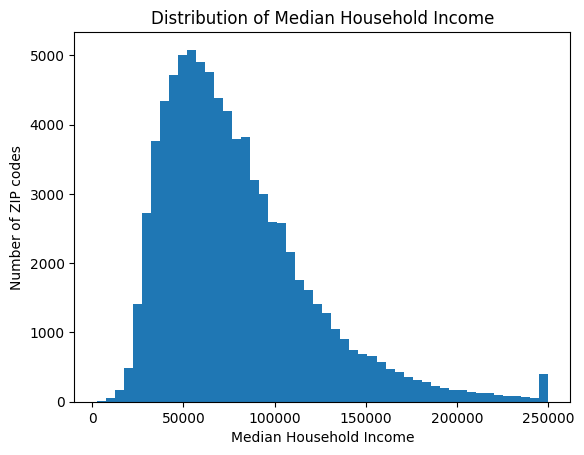

INCOMExRACE
Middle Income White Area    26638
Middle Income POC Area      21208
Low Income POC Area         17637
Low Income White Area       14034
High Income POC Area         1563
High Income White Area       1492
Name: count, dtype: int64


In [184]:
######################################################################
# CREATE INCOMExRACE GROUPS
######################################################################

# Look at distribution of income across households
demographic_data["Median_Household_Income"] = demographic_data["Median_Household_Income"].astype(float)


# Plot histogram
plt.hist(demographic_data["Median_Household_Income"], bins=50)
plt.xlabel("Median Household Income")
plt.ylabel("Number of ZIP codes")
plt.title("Distribution of Median Household Income")
plt.show()

# Double check the max income

demographic_data["Median_Household_Income"].max() # IT'S BEEN CAPPED TO 250K (does not include the ultra wealthy)

# Define California-specific income thresholds
low_income_threshold = 61000   # Below $61k = Low Income
high_income_threshold = 184000 # Above $184k = High Income

# Function to assign demographic bucket
def assign_demographic_bucket(row):
    white_pct = row['White_Portion']
    income = row['Median_Household_Income']

    # Race dominance
    if white_pct >= 60: # Majority (%)
        race_group = 'White'
    else:
        race_group = 'POC'

    # Income level
    if income < low_income_threshold:
        income_group = 'Low Income'
    elif income <= high_income_threshold:
        income_group = 'Middle Income'
    else:
        income_group = 'High Income'

    # Combine into final bucket
    return f"{income_group} {race_group} Area"

# Apply to your dataframe
demographic_data['INCOMExRACE'] = demographic_data.apply(assign_demographic_bucket, axis=1)

# Quick check: how many areas per bucket
print(demographic_data['INCOMExRACE'].value_counts())

In [185]:
demographic_data.isna().sum()

Median_Household_Income                      1011
Total_Population                                0
PRICE                                        2396
Avg_Household_Size                              0
Gini_Index                                      0
Number_Houses                                   0
YEAR                                            0
GEO_UNIQUE_ID                                   0
Employment_Rate                               725
Below_Poverty_Rate                            774
Rate_College_or_Higher                        543
Black_Portion                                 506
White_Portion                                 506
American_Indian_and_Alaska_Native_Portion     506
Asian_Portion                                 506
INCOMExRACE                                     0
dtype: int64

In [186]:
######################################################################
# SAVE DEMOGRAPHIC DATA AS CSV FOR FUTUR USE
######################################################################

demographic_data["YEAR"] = demographic_data["YEAR"].astype(int)
demographic_data["GEO_UNIQUE_ID"] = demographic_data["GEO_UNIQUE_ID"].astype(str)
demographic_data.to_csv("demographic_data.csv", index=False)